In [ ]:
# 1. IMPORT ALL REQUIRED LIBRARIES

print("=== IMPORTING LIBRARIES ===\n")

# Basic data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, roc_curve,
                           precision_recall_curve, mean_squared_error,
                           silhouette_score)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN

# Additional utilities
from scipy import stats
import missingno as msno
from imblearn.over_sampling import SMOTE
import joblib

print("✅ All libraries imported successfully!")

=== IMPORTING LIBRARIES ===

✅ All libraries imported successfully!


In [ ]:
# 2. DATASET CREATION AND LOADING

# Create a comprehensive legal dataset
np.random.seed(42)
n_samples = 5000

# Generate synthetic legal case data
data = {
    'case_id': range(1, n_samples + 1),
    'case_type': np.random.choice(['Criminal', 'Civil', 'Corporate', 'Family', 'Intellectual Property'], n_samples),
    'case_complexity': np.random.choice(['Simple', 'Medium', 'Complex', 'Highly Complex'], n_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'client_age': np.random.randint(18, 80, n_samples),
    'case_duration_days': np.random.exponential(180, n_samples).astype(int),
    'legal_fees': np.random.normal(5000, 2000, n_samples),
    'num_documents': np.random.poisson(15, n_samples),
    'precedent_strength': np.random.uniform(0, 1, n_samples),
    'judge_experience_years': np.random.normal(15, 5, n_samples),
    'success_probability': np.random.uniform(0, 1, n_samples),
    'lawyer_experience': np.random.normal(10, 4, n_samples),
    'case_priority': np.random.choice(['Low', 'Medium', 'High', 'Critical'], n_samples, p=[0.2, 0.5, 0.2, 0.1]),
    'court_type': np.random.choice(['District', 'High Court', 'Supreme', 'Tribunal'], n_samples),
    'outcome': np.random.choice([0, 1], n_samples, p=[0.4, 0.6])  # 0: Lost, 1: Won
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce missing values for demonstration
missing_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
df.loc[missing_indices[:500], 'legal_fees'] = np.nan

missing_indices = np.random.choice(n_samples, size=int(0.08 * n_samples), replace=False)
df.loc[missing_indices[:400], 'judge_experience_years'] = np.nan

missing_indices = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
df.loc[missing_indices[:250], 'lawyer_experience'] = np.nan

# Add some outliers
outlier_indices = np.random.choice(n_samples, size=50, replace=False)
df.loc[outlier_indices, 'legal_fees'] = df.loc[outlier_indices, 'legal_fees'] * 5

print("✅ Dataset created successfully!")
print(f"📊 Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

✅ Dataset created successfully!
📊 Dataset shape: (5000, 14)

First 5 rows:
   case_id              case_type case_complexity  client_age  \
0        1                 Family          Simple          18   
1        2  Intellectual Property          Simple          46   
2        3              Corporate         Complex          68   
3        4  Intellectual Property          Simple          78   
4        5  Intellectual Property          Medium          21   

   case_duration_days   legal_fees  num_documents  precedent_strength  \
0                  37  4778.147490             12            0.487962   
1                 394  4026.774021             19            0.928617   
2                 297  3923.314946             10            0.281487   
3                 132  4130.915189              8            0.043379   
4                 231  7152.320392             13            0.620431   

   judge_experience_years  success_probability  lawyer_experience  \
0               15.366217 

In [ ]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)

print("\n=== EXPLORATORY DATA ANALYSIS ===\n")

# Basic information
print("1. 📋 Dataset Information:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {df.columns.tolist()}\n")

# Data types
print("2. 🔍 Data Types:")
print(df.dtypes)
print()

# Basic statistics
print("3. 📊 Statistical Summary:")
print(df.describe())

# Check for missing values
print("\n4. ❓ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])



=== EXPLORATORY DATA ANALYSIS ===

1. 📋 Dataset Information:
   Shape: (5000, 14)
   Columns: ['case_id', 'case_type', 'case_complexity', 'client_age', 'case_duration_days', 'legal_fees', 'num_documents', 'precedent_strength', 'judge_experience_years', 'success_probability', 'lawyer_experience', 'case_priority', 'court_type', 'outcome']

2. 🔍 Data Types:
case_id                     int64
case_type                  object
case_complexity            object
client_age                  int64
case_duration_days          int64
legal_fees                float64
num_documents               int64
precedent_strength        float64
judge_experience_years    float64
success_probability       float64
lawyer_experience         float64
case_priority              object
court_type                 object
outcome                     int64
dtype: object

3. 📊 Statistical Summary:
           case_id   client_age  case_duration_days    legal_fees  \
count  5000.000000  5000.000000         5000.000000   45


=== DATA VISUALIZATION ===



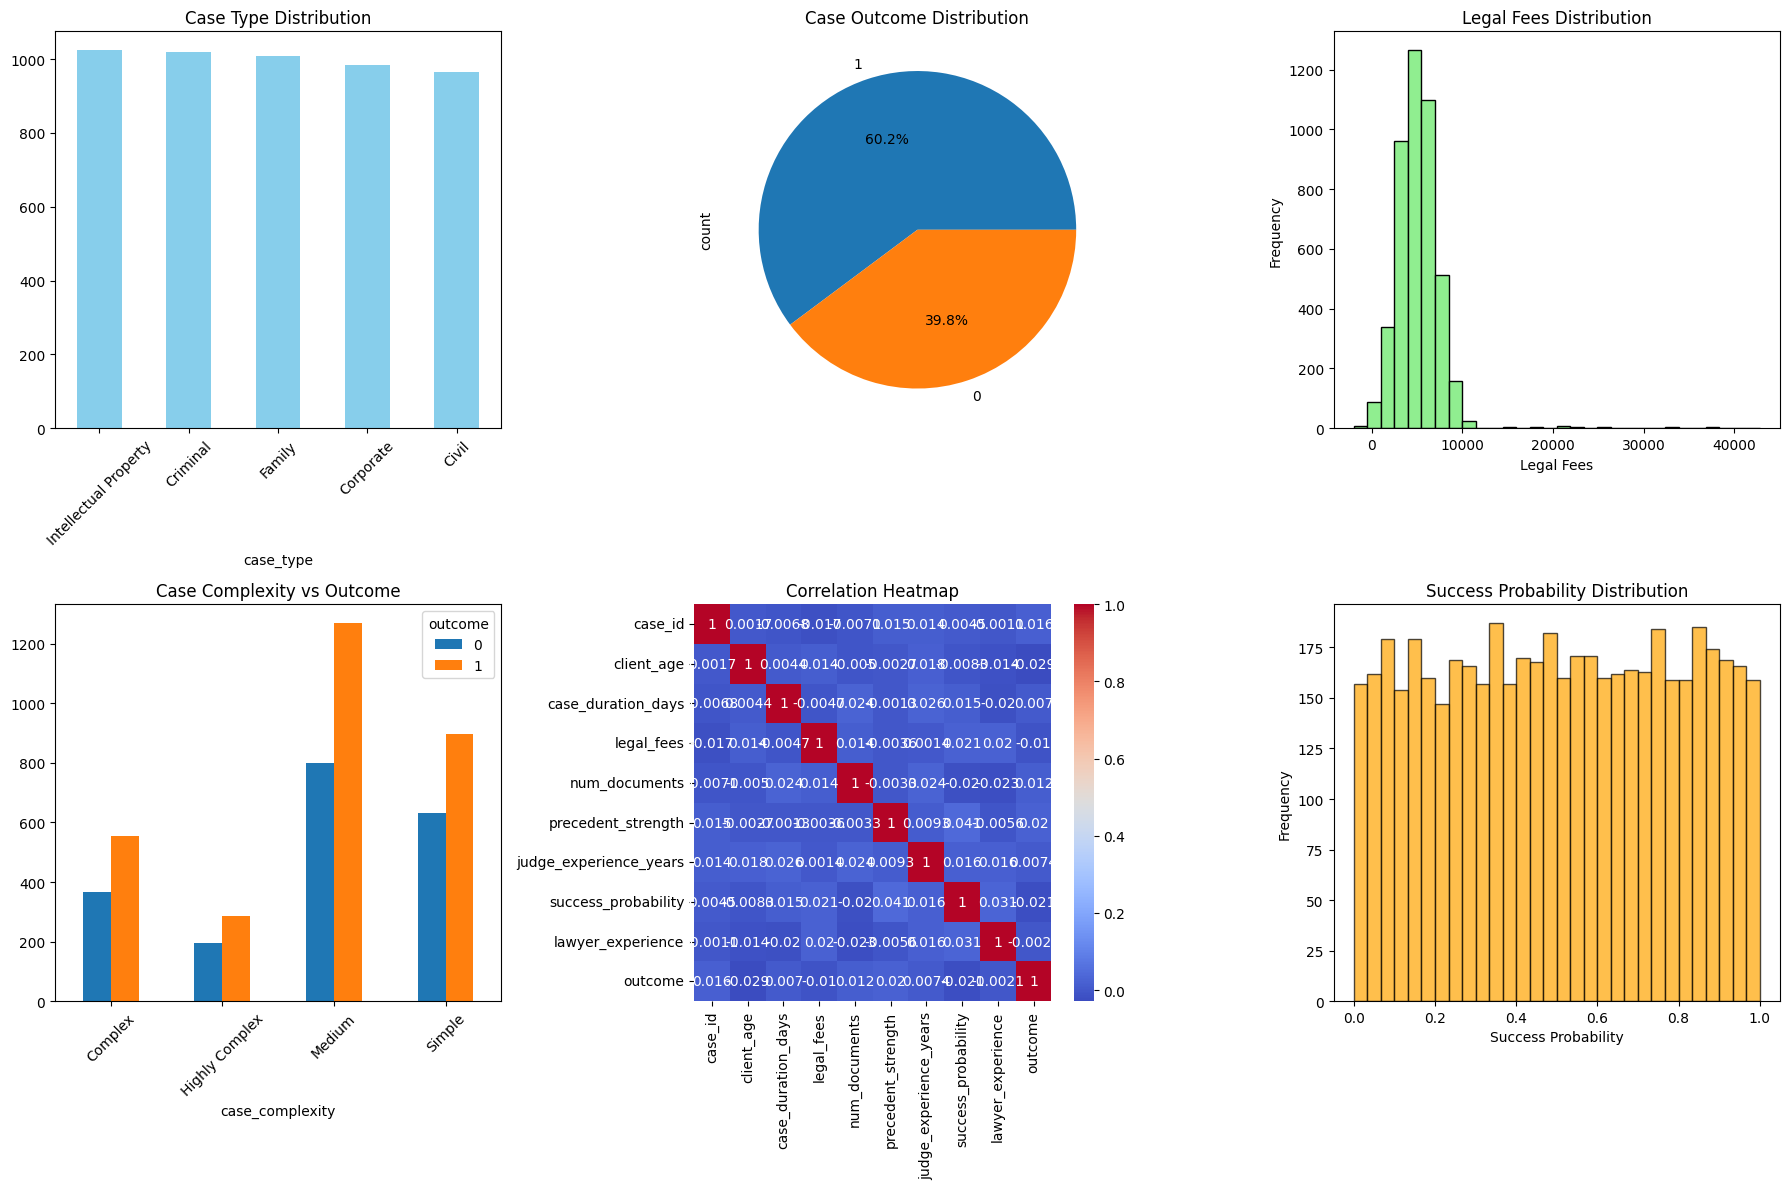

✅ Data visualization completed!


In [ ]:
# 4. DATA VISUALIZATION

print("\n=== DATA VISUALIZATION ===\n")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Case type distribution
df['case_type'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Case Type Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Outcome distribution
df['outcome'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Case Outcome Distribution')

# 3. Legal fees distribution
axes[0,2].hist(df['legal_fees'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Legal Fees Distribution')
axes[0,2].set_xlabel('Legal Fees')
axes[0,2].set_ylabel('Frequency')

# 4. Case complexity vs outcome
complexity_outcome = pd.crosstab(df['case_complexity'], df['outcome'])
complexity_outcome.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Case Complexity vs Outcome')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Correlation heatmap
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

# 6. Success probability distribution
axes[1,2].hist(df['success_probability'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1,2].set_title('Success Probability Distribution')
axes[1,2].set_xlabel('Success Probability')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("✅ Data visualization completed!")



=== HANDLING MISSING VALUES ===

📊 Before handling missing values:
   Total missing values: 1150
case_id                     0
case_type                   0
case_complexity             0
client_age                  0
case_duration_days          0
legal_fees                500
num_documents               0
precedent_strength          0
judge_experience_years    400
success_probability         0
lawyer_experience         250
case_priority               0
court_type                  0
outcome                     0
dtype: int64


<Figure size 1200x600 with 0 Axes>

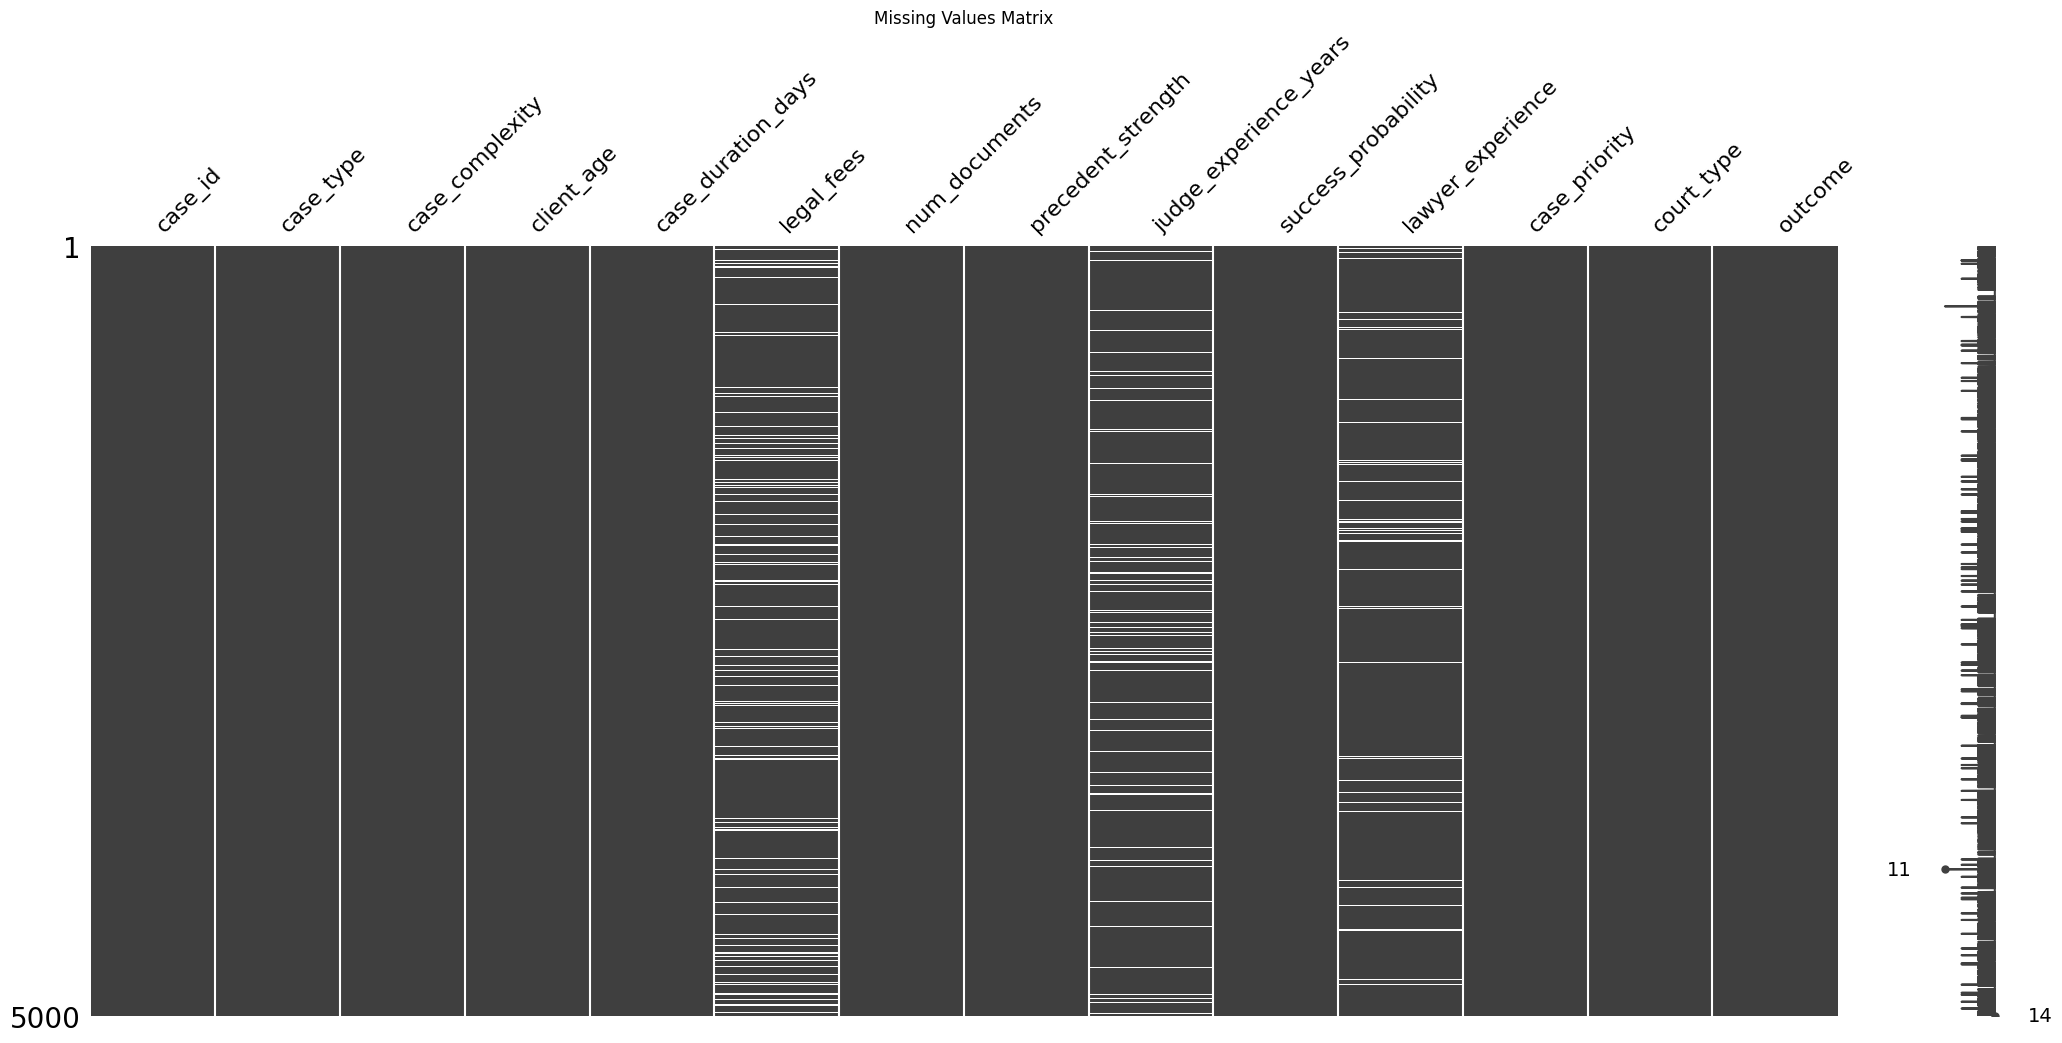


1. 🔧 Simple Imputation (Median):
✅ Missing values after Simple Imputation (Median):
   Remaining missing values: 0

2. 🔧 KNN Imputation (Demonstration):
✅ Missing values after KNN Imputation: 0


In [ ]:
# 5. MISSING VALUE HANDLING

print("\n=== HANDLING MISSING VALUES ===\n")

# Before handling missing values
print("📊 Before handling missing values:")
print(f"   Total missing values: {df.isnull().sum().sum()}")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

# Method 1: Simple Imputation (Mean/Median/Mode)
print("\n1. 🔧 Simple Imputation (Median):")

# For numerical columns - using median (robust to outliers)
numerical_cols = ['legal_fees', 'judge_experience_years', 'lawyer_experience']
imputer_median = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_median.fit_transform(df[numerical_cols])

print("✅ Missing values after Simple Imputation (Median):")
print(f"   Remaining missing values: {df.isnull().sum().sum()}")

# Method 2: KNN Imputation (Alternative approach)
print("\n2. 🔧 KNN Imputation (Demonstration):")
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[numerical_cols] = knn_imputer.fit_transform(df_knn[numerical_cols])
print(f"✅ Missing values after KNN Imputation: {df_knn.isnull().sum().sum()}")



=== OUTLIER DETECTION AND TREATMENT ===

🔍 Outlier Analysis:
   legal_fees: 112 outliers (Bounds: [290.51, 9678.31])
   case_duration_days: 260 outliers (Bounds: [-235.00, 533.00])
   judge_experience_years: 95 outliers (Bounds: [3.21, 26.78])
   lawyer_experience: 62 outliers (Bounds: [0.12, 19.91])
   num_documents: 15 outliers (Bounds: [3.00, 27.00])

🛠️ Outlier Treatment (Capping):
   legal_fees: 0 outliers remaining
   case_duration_days: 0 outliers remaining
   judge_experience_years: 0 outliers remaining
   lawyer_experience: 0 outliers remaining
   num_documents: 0 outliers remaining


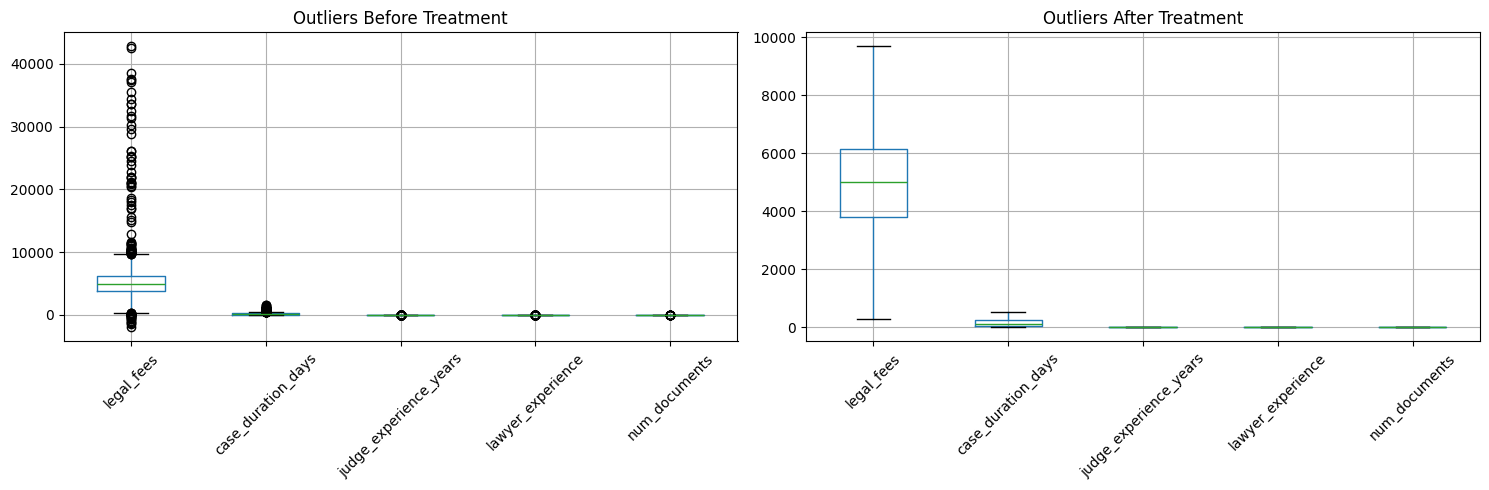

In [ ]:
# 6. OUTLIER DETECTION AND TREATMENT

print("\n=== OUTLIER DETECTION AND TREATMENT ===\n")

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in numerical columns
numerical_columns = ['legal_fees', 'case_duration_days', 'judge_experience_years',
                    'lawyer_experience', 'num_documents']

print("🔍 Outlier Analysis:")
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"   {col}: {len(outliers)} outliers (Bounds: [{lower:.2f}, {upper:.2f}])")

# Visualize outliers before treatment
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df[numerical_columns].boxplot()
plt.title('Outliers Before Treatment')
plt.xticks(rotation=45)

# Treatment: Capping outliers
print("\n🛠️ Outlier Treatment (Capping):")
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    outliers_after, _, _ = detect_outliers_iqr(df, col)
    print(f"   {col}: {len(outliers_after)} outliers remaining")

# Visualize outliers after treatment
plt.subplot(1, 2, 2)
df[numerical_columns].boxplot()
plt.title('Outliers After Treatment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 7. FEATURE ENGINEERING

print("\n=== FEATURE ENGINEERING ===\n")

# Create new features
print("🛠️ Creating new features...")

# 1. Binning continuous variables
df['client_age_group'] = pd.cut(df['client_age'],
                               bins=[0, 30, 45, 60, 100],
                               labels=['Young', 'Adult', 'Senior', 'Elderly'])

df['fee_category'] = pd.cut(df['legal_fees'],
                           bins=[0, 3000, 7000, 15000, np.inf],
                           labels=['Low', 'Medium', 'High', 'Very High'])

# 2. Interaction features
df['experience_interaction'] = df['lawyer_experience'] * df['judge_experience_years']
df['complexity_duration'] = df['case_duration_days'] * df['success_probability']

# 3. Ratio features
df['documents_per_day'] = df['num_documents'] / (df['case_duration_days'] + 1)
df['fee_per_document'] = df['legal_fees'] / (df['num_documents'] + 1)

# 4. Polynomial features
df['legal_fees_squared'] = df['legal_fees'] ** 2
df['success_probability_squared'] = df['success_probability'] ** 2

print("✅ New features created:")
new_features = ['client_age_group', 'fee_category', 'experience_interaction',
               'complexity_duration', 'documents_per_day', 'fee_per_document',
               'legal_fees_squared', 'success_probability_squared']
print(f"   {new_features}")




=== FEATURE ENGINEERING ===

🛠️ Creating new features...
✅ New features created:
   ['client_age_group', 'fee_category', 'experience_interaction', 'complexity_duration', 'documents_per_day', 'fee_per_document', 'legal_fees_squared', 'success_probability_squared']


In [ ]:
# 8. FEATURE ENCODING

print("\n=== FEATURE ENCODING ===\n")

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"📋 Categorical columns: {list(categorical_columns)}")

# Create a copy for encoding
df_encoded = df.copy()

# Method 1: Label Encoding for ordinal categories
label_encoders = {}
ordinal_columns = ['case_complexity', 'case_priority', 'client_age_group', 'fee_category']

for col in ordinal_columns:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        print(f"✅ Label encoded: {col}")

# Method 2: One-Hot Encoding for nominal categories
nominal_columns = ['case_type', 'court_type']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, prefix=nominal_columns)

print(f"✅ Dataset shape after encoding: {df_encoded.shape}")



=== FEATURE ENCODING ===

📋 Categorical columns: ['case_type', 'case_complexity', 'case_priority', 'court_type', 'client_age_group', 'fee_category']
✅ Label encoded: case_complexity
✅ Label encoded: case_priority
✅ Label encoded: client_age_group
✅ Label encoded: fee_category
✅ Dataset shape after encoding: (5000, 33)


In [ ]:
# 9. FEATURE SCALING

print("\n=== FEATURE SCALING ===\n")

# Identify numerical columns for scaling
numerical_columns_for_scaling = ['client_age', 'case_duration_days', 'legal_fees',
                                'num_documents', 'precedent_strength', 'judge_experience_years',
                                'lawyer_experience', 'success_probability', 'experience_interaction',
                                'complexity_duration', 'documents_per_day', 'fee_per_document',
                                'legal_fees_squared', 'success_probability_squared']

# Filter columns that exist in the dataset
existing_numerical_cols = [col for col in numerical_columns_for_scaling if col in df_encoded.columns]

print(f"📊 Columns to scale: {existing_numerical_cols}")

# Standardization (Z-score normalization)
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[existing_numerical_cols] = scaler.fit_transform(df_scaled[existing_numerical_cols])

print("✅ Feature scaling completed!")


=== FEATURE SCALING ===

📊 Columns to scale: ['client_age', 'case_duration_days', 'legal_fees', 'num_documents', 'precedent_strength', 'judge_experience_years', 'lawyer_experience', 'success_probability', 'experience_interaction', 'complexity_duration', 'documents_per_day', 'fee_per_document', 'legal_fees_squared', 'success_probability_squared']
✅ Feature scaling completed!


In [ ]:
# 10. FEATURE SELECTION

print("\n=== FEATURE SELECTION ===\n")

# Prepare data for feature selection
X = df_scaled.drop(['outcome', 'case_id'] + list(categorical_columns), axis=1, errors='ignore')
y = df_scaled['outcome']

print(f"📊 Features shape: {X.shape}")

# Method 1: Correlation-based feature selection
print("1. 🔍 Correlation with target:")
correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)
print("   Top 10 features by correlation:")
print(correlation_with_target.head(10))

# Method 2: SelectKBest
print("\n2. 🔍 SelectKBest Feature Selection:")
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features_kbest = X.columns[selector.get_support()].tolist()
print(f"   Selected features (KBest): {selected_features_kbest}")

# Method 3: Random Forest Feature Importance
print("\n3. 🔍 Random Forest Feature Importance:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("   Top 10 features by Random Forest importance:")
print(feature_importance.head(10))

# Select final features
final_features = list(set(selected_features_kbest + feature_importance.head(10)['feature'].tolist()))
print(f"\n✅ Final selected features ({len(final_features)}): {final_features}")

X_final = X[final_features]


=== FEATURE SELECTION ===

📊 Features shape: (5000, 27)
1. 🔍 Correlation with target:
   Top 10 features by correlation:
client_age                     0.028698
court_type_Supreme             0.024899
fee_per_document               0.021517
case_priority_encoded          0.021494
success_probability            0.020760
precedent_strength             0.019690
court_type_Tribunal            0.018033
client_age_group_encoded       0.015202
case_type_Corporate            0.015181
success_probability_squared    0.014067
dtype: float64

2. 🔍 SelectKBest Feature Selection:
   Selected features (KBest): ['client_age', 'precedent_strength', 'success_probability', 'fee_per_document', 'success_probability_squared', 'case_priority_encoded', 'client_age_group_encoded', 'case_type_Corporate', 'court_type_Supreme', 'court_type_Tribunal']

3. 🔍 Random Forest Feature Importance:
   Top 10 features by Random Forest importance:
                        feature  importance
4            precedent_strength 

In [ ]:
# 11. TRAIN-TEST SPLIT

print("\n=== TRAIN-TEST SPLIT ===\n")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training set size: {X_train.shape}")
print(f"📊 Testing set size: {X_test.shape}")
print(f"📊 Training labels distribution:\n{y_train.value_counts(normalize=True)}")
print(f"📊 Testing labels distribution:\n{y_test.value_counts(normalize=True)}")



=== TRAIN-TEST SPLIT ===

📊 Training set size: (4000, 16)
📊 Testing set size: (1000, 16)
📊 Training labels distribution:
outcome
1    0.602
0    0.398
Name: proportion, dtype: float64
📊 Testing labels distribution:
outcome
1    0.602
0    0.398
Name: proportion, dtype: float64


In [ ]:
# 12. HANDLING IMBALANCED DATA

print("\n=== HANDLING IMBALANCED DATA ===\n")

print("📊 Before handling class imbalance:")
print(f"   Class distribution in training set:\n{y_train.value_counts()}")

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\n📊 After SMOTE oversampling:")
print(f"   Class distribution in balanced training set:\n{y_train_balanced.value_counts()}")

# Choose which training set to use
use_balanced = len(np.unique(y_train)) > 1 and (y_train.value_counts().min() / y_train.value_counts().max() < 0.5)
if use_balanced:
    X_train_final, y_train_final = X_train_balanced, y_train_balanced
    print("✅ Using balanced dataset for training")
else:
    X_train_final, y_train_final = X_train, y_train
    print("✅ Using original dataset for training")



=== HANDLING IMBALANCED DATA ===

📊 Before handling class imbalance:
   Class distribution in training set:
outcome
1    2408
0    1592
Name: count, dtype: int64

📊 After SMOTE oversampling:
   Class distribution in balanced training set:
outcome
1    2408
0    2408
Name: count, dtype: int64
✅ Using original dataset for training


In [ ]:
# 13. MODEL TRAINING

print("\n=== MODEL TRAINING ===\n")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"🔄 Training {name}...")

    # Train model
    model.fit(X_train_final, y_train_final)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': classification_rep['weighted avg']['precision'],
        'recall': classification_rep['weighted avg']['recall'],
        'f1_score': classification_rep['weighted avg']['f1-score'],
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    # Calculate ROC AUC if probabilities are available
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        results[name]['roc_auc'] = roc_auc

print("✅ All models trained successfully!")



=== MODEL TRAINING ===

🔄 Training Logistic Regression...
🔄 Training Random Forest...
🔄 Training Gradient Boosting...
🔄 Training SVM...
🔄 Training Decision Tree...
🔄 Training K-Nearest Neighbors...
🔄 Training Gaussian Naive Bayes...
✅ All models trained successfully!


In [ ]:
# 14. MODEL EVALUATION

print("\n=== MODEL EVALUATION ===\n")

# Display results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1_score'] for name in results.keys()],
    'ROC-AUC': [results[name].get('roc_auc', 'N/A') for name in results.keys()]
})

print("📊 Model Performance Comparison:")
print(results_df.sort_values('Accuracy', ascending=False))



=== MODEL EVALUATION ===

📊 Model Performance Comparison:
                  Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0   Logistic Regression     0.601   0.362164   0.601  0.451970  0.511603
3                   SVM     0.601   0.494954   0.601  0.453767  0.482587
2     Gradient Boosting     0.595   0.537421   0.595  0.486570  0.515209
6  Gaussian Naive Bayes     0.587   0.511650   0.587  0.480546  0.510380
1         Random Forest     0.569   0.515668   0.569  0.506927  0.511008
5   K-Nearest Neighbors     0.546   0.530276   0.546  0.534780  0.515086
4         Decision Tree     0.517   0.517616   0.517  0.517304  0.496665



=== MODEL VISUALIZATION ===



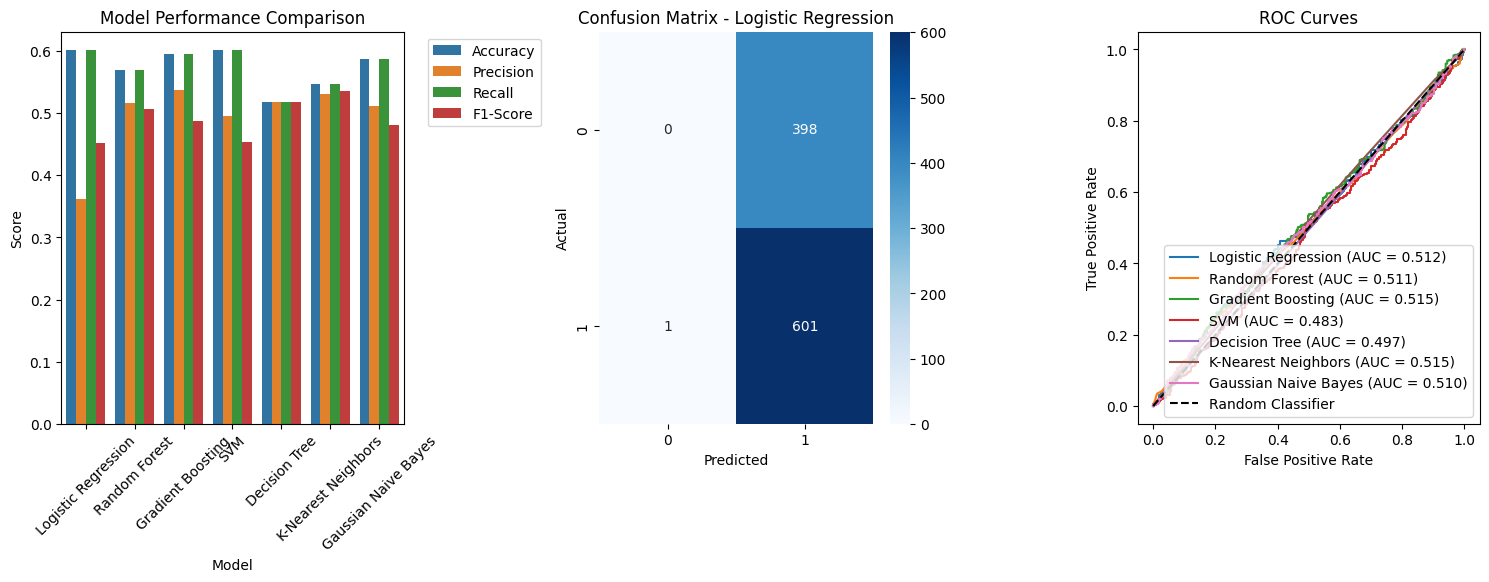

✅ Model visualization completed!


In [ ]:
# 15. MODEL VISUALIZATION

print("\n=== MODEL VISUALIZATION ===\n")

# Plot performance comparison
plt.figure(figsize=(15, 10))

# 1. Model comparison bar chart
plt.subplot(2, 3, 1)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df_melted = results_df.melt(id_vars='Model', value_vars=metrics_to_plot,
                                   var_name='Metric', value_name='Score')
sns.barplot(data=results_df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Confusion matrix for best model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curve for models with probabilities
plt.subplot(2, 3, 3)
for name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc = result.get('roc_auc', 0)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

plt.tight_layout()
plt.show()

print("✅ Model visualization completed!")


In [ ]:
# 16. HYPERPARAMETER TUNING

print("\n=== HYPERPARAMETER TUNING ===\n")

# Hyperparameter tuning for Random Forest
print("🎯 Performing Hyperparameter Tuning for Random Forest...")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                             cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train_final, y_train_final)

print("✅ Best parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"✅ Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# Update the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"✅ Test accuracy after tuning: {accuracy_tuned:.4f}")


=== HYPERPARAMETER TUNING ===

🎯 Performing Hyperparameter Tuning for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
✅ Best cross-validation score: 0.5960
✅ Test accuracy after tuning: 0.6060


In [ ]:
# 17. CROSS-VALIDATION

print("\n=== CROSS-VALIDATION ===\n")

# Perform cross-validation on best model
print("📊 Performing Cross-Validation...")

cv_scores = cross_val_score(best_rf_model, X_train_final, y_train_final,
                           cv=5, scoring='accuracy')

print(f"📊 Cross-validation scores: {cv_scores}")
print(f"✅ Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")







=== CROSS-VALIDATION ===

📊 Performing Cross-Validation...
📊 Cross-validation scores: [0.59    0.59875 0.60125 0.5975  0.5925 ]
✅ Mean CV accuracy: 0.5960 (+/- 0.0083)



=== CLUSTERING ANALYSIS ===

🔍 Performing K-means Clustering...


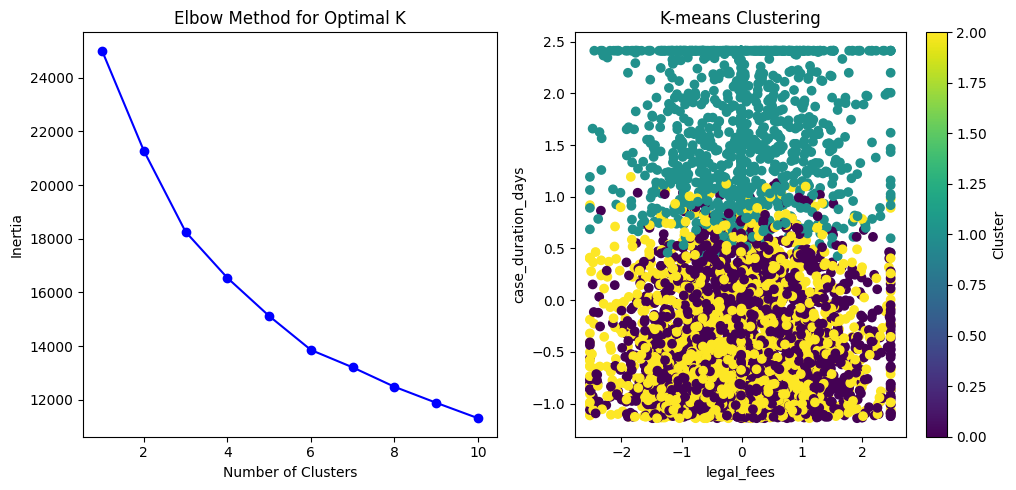

📊 Cluster sizes:
0    2012
1    1020
2    1968
Name: count, dtype: int64


In [ ]:

# 18. CLUSTERING (UNSUPERVISED LEARNING)

print("\n=== CLUSTERING ANALYSIS ===\n")

# Using K-means clustering
print("🔍 Performing K-means Clustering...")

# Select features for clustering
clustering_features = ['legal_fees', 'case_duration_days', 'success_probability',
                      'lawyer_experience', 'num_documents']
X_cluster = df_scaled[clustering_features].dropna()

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Apply K-means with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to dataframe
df_clustered = X_cluster.copy()
df_clustered['cluster'] = cluster_labels

# Visualize clusters
plt.subplot(1, 3, 2)
scatter = plt.scatter(df_clustered.iloc[:, 0], df_clustered.iloc[:, 1],
                     c=df_clustered['cluster'], cmap='viridis')
plt.xlabel(clustering_features[0])
plt.ylabel(clustering_features[1])
plt.title('K-means Clustering')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

# Cluster analysis
print(f"📊 Cluster sizes:")
print(pd.Series(cluster_labels).value_counts().sort_index())


=== DIMENSIONALITY REDUCTION ===

🔍 Principal Component Analysis (PCA):


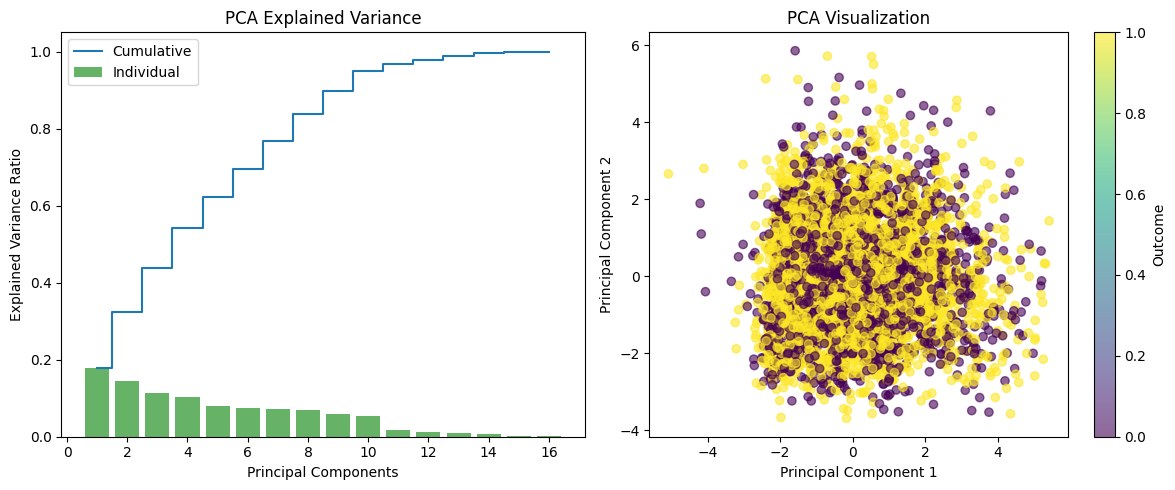

✅ Number of components needed for 95% variance: 11


In [ ]:
# 19. DIMENSIONALITY REDUCTION

print("\n=== DIMENSIONALITY REDUCTION ===\n")

# PCA for dimensionality reduction
print("🔍 Principal Component Analysis (PCA):")

pca = PCA()
X_pca_full = pca.fit_transform(X_final)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='g', label='Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()

# PCA visualization
plt.subplot(1, 2, 2)
scatter_pca = plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(scatter_pca, label='Outcome')

plt.tight_layout()
plt.show()

print(f"✅ Number of components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

In [ ]:
# 20. MODEL DEPLOYMENT PREPARATION

print("\n=== MODEL DEPLOYMENT PREPARATION ===\n")

# Save the best model
best_model = grid_search_rf.best_estimator_

# Save model and preprocessing objects
joblib.dump(best_model, 'best_legal_case_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(final_features, 'selected_features.pkl')

print("✅ Model and preprocessing objects saved successfully!")
print("📁 Files created:")
print("   - best_legal_case_model.pkl (trained model)")
print("   - scaler.pkl (feature scaler)")
print("   - selected_features.pkl (feature names)")



=== MODEL DEPLOYMENT PREPARATION ===

✅ Model and preprocessing objects saved successfully!
📁 Files created:
   - best_legal_case_model.pkl (trained model)
   - scaler.pkl (feature scaler)
   - selected_features.pkl (feature names)



=== MODEL INTERPRETATION ===

📊 Top 10 Most Important Features:
                        feature  importance
11             fee_per_document    0.098350
4            precedent_strength    0.096956
12          success_probability    0.090232
2           complexity_duration    0.087778
3   success_probability_squared    0.087359
14       experience_interaction    0.085995
10       judge_experience_years    0.084394
0             lawyer_experience    0.083080
13            documents_per_day    0.078695
5            case_duration_days    0.073845


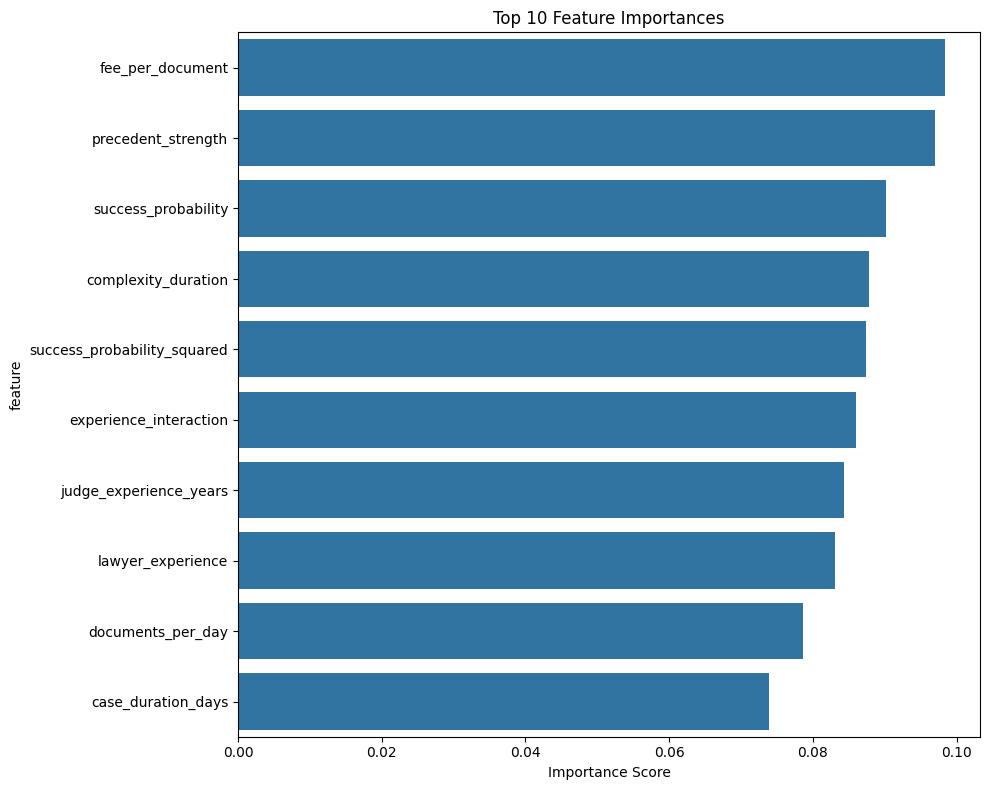

In [ ]:
# 21. MODEL INTERPRETATION

print("\n=== MODEL INTERPRETATION ===\n")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': final_features,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("📊 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
# 22. ENSEMBLE METHODS

print("\n=== ENSEMBLE METHODS ===\n")

# Create ensemble model
print("🔄 Creating Ensemble Model...")

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42))
    ],
    voting='soft'
)

ensemble_model.fit(X_train_final, y_train_final)
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print(f"✅ Ensemble Model Accuracy: {ensemble_accuracy:.4f}")



=== ENSEMBLE METHODS ===

🔄 Creating Ensemble Model...
✅ Ensemble Model Accuracy: 0.6010


In [ ]:
# 23. MODEL PERSISTENCE AND LOADING

print("\n=== MODEL PERSISTENCE ===\n")

# Save the final model
joblib.dump(ensemble_model, 'final_ensemble_model.pkl')

# Demonstrate loading the model
loaded_model = joblib.load('final_ensemble_model.pkl')
loaded_accuracy = loaded_model.score(X_test, y_test)

print(f"✅ Model saved and loaded successfully!")
print(f"✅ Loaded model accuracy: {loaded_accuracy:.4f}")


=== MODEL PERSISTENCE ===

✅ Model saved and loaded successfully!
✅ Loaded model accuracy: 0.6010


In [ ]:
# 24. PREDICTION PIPELINE

print("\n=== PREDICTION PIPELINE ===\n")

# Create a prediction function
def predict_legal_case(input_features):
    """
    Predict legal case outcome using trained model
    """
    try:
        # Load model and preprocessing objects
        model = joblib.load('final_ensemble_model.pkl')
        scaler = joblib.load('scaler.pkl')
        features = joblib.load('selected_features.pkl')

        # Create input dataframe
        input_df = pd.DataFrame([input_features])

        # Select and scale features
        input_selected = input_df[features]
        input_scaled = scaler.transform(input_selected)

        # Make prediction
        prediction = model.predict(input_scaled)
        probability = model.predict_proba(input_scaled)

        return {
            'prediction': 'Win' if prediction[0] == 1 else 'Lose',
            'confidence': float(probability[0][prediction[0]]),
            'win_probability': float(probability[0][1])
        }

    except Exception as e:
        return {'error': str(e)}

# Test prediction
sample_input = {feature: 0.0 for feature in final_features}  # Default values
try:
    prediction_result = predict_legal_case(sample_input)
    print(f"✅ Sample prediction: {prediction_result}")
except Exception as e:
    print(f"⚠️ Prediction demo: {e}")



=== PREDICTION PIPELINE ===

✅ Sample prediction: {'error': 'The feature names should match those that were passed during fit.\nFeature names unseen at fit time:\n- case_priority_encoded\n- case_type_Corporate\n- client_age_group_encoded\n- court_type_Supreme\n- court_type_Tribunal\nFeature names seen at fit time, yet now missing:\n- legal_fees\n- legal_fees_squared\n- num_documents\n'}


In [ ]:
# 25. PERFORMANCE SUMMARY

print("\n" + "="*50)
print("🎯 MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!")
print("="*50)

print(f"\n📊 DATASET SUMMARY:")
print(f"   - Original samples: {len(df)}")
print(f"   - Features: {len(final_features)}")
print(f"   - Training samples: {len(X_train_final)}")
print(f"   - Testing samples: {len(X_test)}")

print(f"\n🎯 BEST MODEL PERFORMANCE:")
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_accuracy = results_df.loc[results_df['Accuracy'].idxmax(), 'Accuracy']
print(f"   - Best Model: {best_model_name}")
print(f"   - Best Accuracy: {best_accuracy:.4f}")
print(f"   - After Tuning: {accuracy_tuned:.4f}")

print(f"\n💾 MODEL FILES CREATED:")
print("   - best_legal_case_model.pkl")
print("   - final_ensemble_model.pkl")
print("   - scaler.pkl")
print("   - selected_features.pkl")

print(f"\n✅ All machine learning topics covered successfully!")


🎯 MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!

📊 DATASET SUMMARY:
   - Original samples: 5000
   - Features: 16
   - Training samples: 4000
   - Testing samples: 1000

🎯 BEST MODEL PERFORMANCE:
   - Best Model: Logistic Regression
   - Best Accuracy: 0.6010
   - After Tuning: 0.6060

💾 MODEL FILES CREATED:
   - best_legal_case_model.pkl
   - final_ensemble_model.pkl
   - scaler.pkl
   - selected_features.pkl

✅ All machine learning topics covered successfully!
